In [24]:
root = '/data/vision/torralba/health-habits/other/enes/'

%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys
import random
import json
import math
import time
import fnmatch
import os
import scipy.misc
import ujson, gzip
sys.path.append( root + 'Utils/')

import pandas as pd
import numpy as np
import tensorflow as tf

from PIL import Image
from IPython.display import display
from pprint import pprint
from notebook_utils import *
from skimage import color, io

In [14]:
f = gzip.open('/afs/csail.mit.edu/u/k/kocabey/TF_colorization/dataset_indexes/imagenet_train_256_saturation_values.json.gz', 'rt')
saturation_index = ujson.load(f)
saturation_index['n03982430/n03982430_22677.JPEG']
len(saturation_index)

1281145

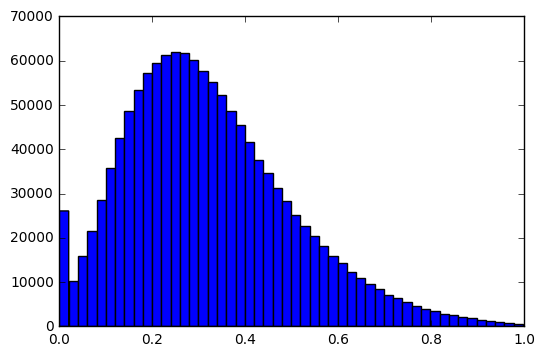

In [17]:
plt.hist( saturation_index.values(), bins = 50 )
plt.show()

In [22]:
imagenet_root = '/data/vision/torralba/yusuf/imagenet/data/images/train256/'

In [37]:
bad_images = [k for (k,v) in saturation_index.items() if v < 0.1]
print len(bad_images)
bad_images = random.sample( bad_images, 20 )

102697


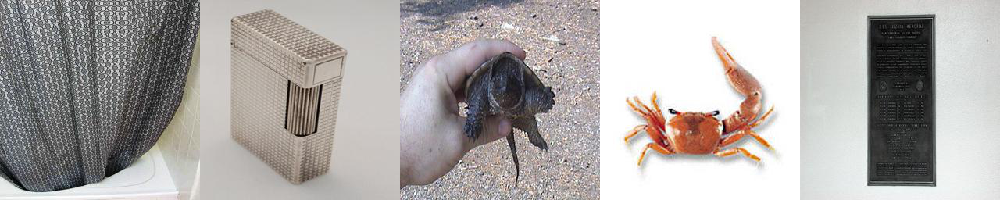

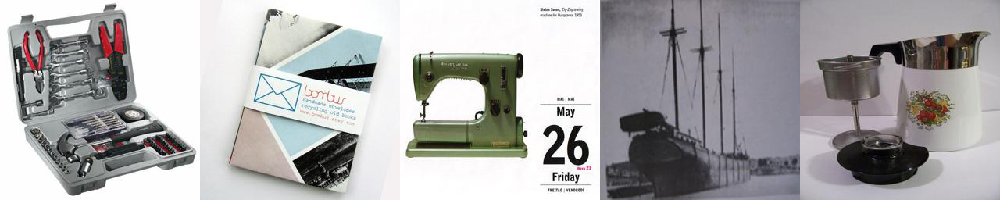

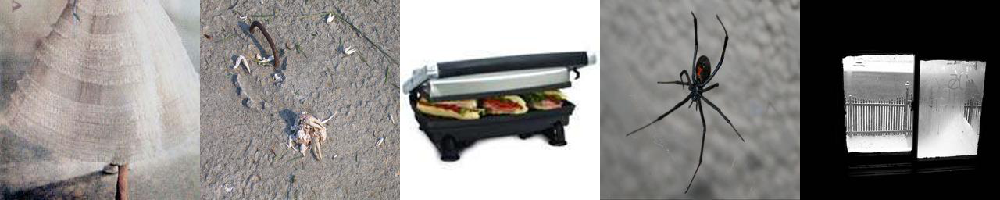

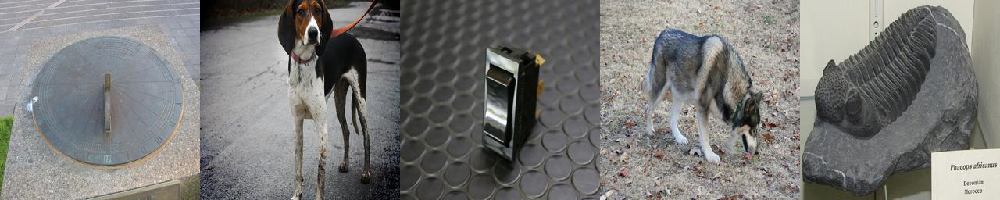

In [36]:
show_images( [Image.open(imagenet_root + bad_images[i]).resize((200,200)) for i in range(20)], 5 )

In [42]:
all_paths = [k for (k,v) in saturation_index.items() if v > 0.1]
print len(all_paths)

1178311


In [50]:
sampled_paths = random.sample( all_paths, 10000 )

In [52]:
ctr = 0
for (i,path) in enumerate(sampled_paths):
  write((i,ctr))
  if os.path.exists(imagenet_root + path): 
    ctr += 1
print ctr

 (9999, 9999)10000
